# Example 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def loss(x, y, func=1):
    if func == 1:
        return -(1/8)*x**2 - (1/2)*y**2 + (3/5)*x*y
    elif func == 2:
        return (1/2)*x**2 + (1/2)*y**2 + 4*x*y
    else:
        return (-(1/8)*(x-1)**2 - (1/2)*(y-1)**2 + (3/5)*(x-1)*(y-1))*x**2*y**2 + ((1/2)*x**2 + (1/2)*y**2 + 4*x*y)*(x-1)**2*(y-1)**2

def grad(x, y, func=1):
    if func == 1:
        return np.array([(1/4)*x - (3/5)*y, -y + (3/5)*x])
    elif func == 2:
        return np.array([-x - 4*y, y + 4*x])
    else:
        return np.array([((1/4)*(x-1) - (3/5)*(y-1))*x**2*y**2 - (-(1/8)*(x-1)**2 - (1/2)*(y-1)**2 + (3/5)*(x-1)*(y-1))*2*x*y**2 \
                         - (x + 4*y)*(x-1)**2*(y-1)**2 - ((1/2)*x**2 + (1/2)*y**2 + 4*x*y)*2*(x-1)*(y-1)**2, \
                         (-(y-1) + (3/5)*(x-1))*x**2*y**2 + (-(1/8)*(x-1)**2 - (1/2)*(y-1)**2 + (3/5)*(x-1)*(y-1))*x**2*2*y \
                         + (y + 4*x)*(x-1)**2*(y-1)**2 + ((1/2)*x**2 + (1/2)*y**2 + 4*x*y)*(x-1)**2*2*(y-1)])

def SGDA(x0, y0, func=1, Nitr=20000, alpha=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    for i in range(Nitr):
        g = grad(x, y, func)
        x += alpha*(g[0] + np.random.normal(scale=noise_scale))
        y += alpha*(g[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        if abs(x) > 1e3 or abs(y) > 1e3:
            # print('Diverge!')
            break
        if (x-xys[i-1][0])**2 + (y-xys[i-1][1])**2 < 1e-10:
            if (x-1)**2 + y**2 < 0.02:
                cnvg_point = 1
                break
            if (x-1)**2 + (y-1)**2 < 0.02:
                cnvg_point = 2
                break
            if x**2 + y**2 < 0.02:
                cnvg_point = 3
                break
            if (x-0.3301)**2 + (y-0.3357)**2 < 0.02:
                cnvg_point = 4
                break
            if x**2 + (y-1)**2 < 0.02:
                cnvg_point = 5
                break
            else:
                cnvg_point = 6
                print('Warning: Unexpected converging points: (%1.2f, %1.2f)' % (x, y))
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')    
    return np.array([x, y]), cnvg_point, i

def OSGDA(x0, y0, func=1, Nitr=20000, alpha=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    g_prev = np.zeros(2)
    for i in range(Nitr):
        g = grad(x, y, func)
        x += alpha*(2*g[0] - g_prev[0] + np.random.normal(scale=noise_scale))
        y += alpha*(2*g[1] - g_prev[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        g_prev = np.copy(g)
        if abs(x) > 1e3 or abs(y) > 1e3:
            # print('Diverge!')
            break
        if (x-xys[i-1][0])**2 + (y-xys[i-1][1])**2 < 1e-10:
            if (x-1)**2 + y**2 < 0.02:
                cnvg_point = 1
                break
            if (x-1)**2 + (y-1)**2 < 0.02:
                cnvg_point = 2
                break
            if x**2 + y**2 < 0.02:
                cnvg_point = 3
                break
            if (x-0.3301)**2 + (y-0.3357)**2 < 0.02:
                cnvg_point = 4
                break
            if x**2 + (y-1)**2 < 0.02:
                cnvg_point = 5
                break
            else:
                cnvg_point = 6
                print('Warning: Unexpected converging points: (%1.2f, %1.2f)' % (x, y))
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')    
    return np.array([x, y]), cnvg_point, i

def TTUR(x0, y0, func=1, Nitr=20000, alpha_x=0.01, alpha_y=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    for i in range(Nitr):
        g = grad(x, y, func)
        x += alpha_x*(g[0] + np.random.normal(scale=noise_scale))
        y += alpha_y*(g[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        if abs(x) > 1e3 or abs(y) > 1e3:
            # print('Diverge!')
            break
        if (x-xys[i-1][0])**2 + (y-xys[i-1][1])**2 < 1e-10:
            if (x-1)**2 + y**2 < 0.02:
                cnvg_point = 1
                break
            if (x-1)**2 + (y-1)**2 < 0.02:
                cnvg_point = 2
                break
            if x**2 + y**2 < 0.02:
                cnvg_point = 3
                break
            if (x-0.3301)**2 + (y-0.3357)**2 < 0.02:
                cnvg_point = 4
                break
            if x**2 + (y-1)**2 < 0.02:
                cnvg_point = 5
                break
            else:
                cnvg_point = 6
                print('Warning: Unexpected converging points: (%1.2f, %1.2f)' % (x, y))
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')    
    return np.array([x, y]), cnvg_point, i

def OSGDA_TTUR(x0, y0, func=1, Nitr=20000, alpha_x=0.01, alpha_y=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    g_prev = np.zeros(2)
    for i in range(Nitr):
        g = grad(x, y, func)
        x += alpha_x*(2*g[0] - g_prev[0] + np.random.normal(scale=noise_scale))
        y += alpha_y*(2*g[1] - g_prev[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        g_prev = np.copy(g)
        if abs(x) > 1e3 or abs(y) > 1e3:
            # print('Diverge!')
            break
        if (x-xys[i-1][0])**2 + (y-xys[i-1][1])**2 < 1e-10:
            if (x-1)**2 + y**2 < 0.02:
                cnvg_point = 1
                break
            if (x-1)**2 + (y-1)**2 < 0.02:
                cnvg_point = 2
                break
            if x**2 + y**2 < 0.02:
                cnvg_point = 3
                break
            if (x-0.3301)**2 + (y-0.3357)**2 < 0.02:
                cnvg_point = 4
                break
            if x**2 + (y-1)**2 < 0.02:
                cnvg_point = 5
                break
            else:
                cnvg_point = 6
                print('Warning: Unexpected converging points: (%1.2f, %1.2f)' % (x, y))
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')    
    return np.array([x, y]), cnvg_point, i

In [63]:
n_trials = 2000

### SGDA

In [65]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = SGDA(x, y, func=3, alpha=0.1)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

168.2873194221509
[0.377  0.4075 0.2155 0.     0.     0.     0.    ]


In [66]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = SGDA(x, y, func=3, alpha=0.1, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

907.2834890965732
[0.358  0.4145 0.2275 0.     0.     0.     0.    ]


In [67]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = SGDA(x, y, func=3, alpha=0.01)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

1195.6151260504203
[0.405 0.351 0.244 0.    0.    0.    0.   ]


In [81]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = SGDA(x, y, func=3, alpha=0.01, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

826.6785411365564
[0.4105 0.368  0.2215 0.     0.     0.     0.    ]


### OSGDA

In [69]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA(x, y, func=3, alpha=0.1)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
    
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

161.80059523809524
[0.328  0.3835 0.224  0.0645 0.     0.     0.    ]


In [70]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA(x, y, func=3, alpha=0.1, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
    
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

1159.4812874251497
[0.332  0.3895 0.2205 0.058  0.     0.     0.    ]


In [71]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA(x, y, func=3, alpha=0.01)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
    
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

2937.9276485788114
[0.226  0.3705 0.2355 0.168  0.     0.     0.    ]


In [72]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA(x, y, func=3, alpha=0.01, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
    
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

2120.588961038961
[0.23   0.3945 0.2175 0.158  0.     0.     0.    ]


### TTUR

In [73]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = TTUR(x, y, func=3, alpha_x=0.01, alpha_y=0.1)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

1019.2390953150242
[0.381  0.4125 0.2065 0.     0.     0.     0.    ]


In [74]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = TTUR(x, y, func=3, alpha_x=0.01, alpha_y=0.1, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

648.5739549839228
[0.378  0.4295 0.1925 0.     0.     0.     0.    ]


In [75]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = TTUR(x, y, func=3, alpha_x=0.1, alpha_y=0.01)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

697.8257053291536
[0.2025 0.549  0.     0.2485 0.     0.     0.    ]


In [76]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = TTUR(x, y, func=3, alpha_x=0.1, alpha_y=0.01, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

728.5547770700637
[0.215 0.555 0.    0.23  0.    0.    0.   ]


### OTTUR

In [77]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA_TTUR(x, y, func=3, alpha_x=0.1, alpha_y=0.01)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

734.7249508840864
[0.2365 0.5335 0.     0.23   0.     0.     0.    ]


In [78]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA_TTUR(x, y, func=3, alpha_x=0.1, alpha_y=0.01, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

748.1272493573265
[0.222 0.551 0.    0.227 0.    0.    0.   ]


In [79]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA_TTUR(x, y, func=3, alpha_x=0.01, alpha_y=0.1)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

992.6497461928934
[0.409 0.402 0.189 0.    0.    0.    0.   ]


In [80]:
cnvg_point_prob = np.zeros(7)
itr_avg = 0
for i in range(n_trials):
    x = np.random.uniform(-0.5, 1.5)
    y = np.random.uniform(-0.5, 1.5)
    z, cnvg_point, itr = OSGDA_TTUR(x, y, func=3, alpha_x=0.01, alpha_y=0.1, noise_scale=0.002)
    cnvg_point_prob[cnvg_point] += 1
    if cnvg_point > 0:
        itr_avg += itr

itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials
print(itr_avg)
print(cnvg_point_prob)

659.6186085498742
[0.4035 0.4165 0.179  0.     0.001  0.     0.    ]


### SGDA dynamics

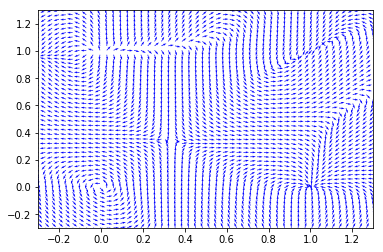

In [93]:
N = 50
xs = np.linspace(-0.3, 1.3, num=N)
ys = np.linspace(-0.3, 1.3, num=N)
grads = np.zeros((N, N, 2))
for i in range(len(xs)):
    for j in range(len(ys)):
        v = grad(xs[i], ys[j], func=3)
        grads[j, i] = np.divide(v, np.linalg.norm(v), out=np.zeros_like(v), where=np.linalg.norm(v)!=0)
plt.quiver(xs, ys, grads[:, :, 0], grads[:, :, 1], scale=60, width=0.002, color='blue')
plt.xlim(-0.3, 1.3)
plt.ylim(-0.3, 1.3)
plt.savefig('example1_gradient.pdf')